In [2]:

import os
#choose "cpu" or "gpu"
os.environ['THEANO FLAGS']= 'device=gpu'

#following line is useful for fast compilation while using Cpu
#os.environ['THEANO FLAGS']= 'mode=FAST_COMPILE'

#following line is useful for fast compilation while using Gpu
os.environ['THEANO FLAGS']= 'optimizer=fast_compile'

In [3]:

import matplotlib.pyplot as plt
import random
import keras as model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
% matplotlib inline

In [4]:
data = np.loadtxt("focus_baseline.csv", delimiter=",", skiprows=1)

Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 10s    
[0 0 0 ..., 1 1 1]


ValueError: x and y must have same first dimension

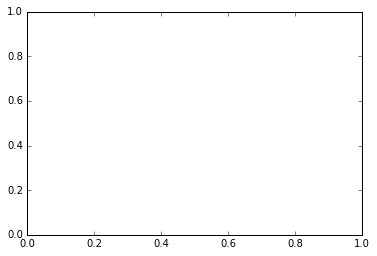

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 1
timesteps = 50
nb_classes = 2

def func1(x):
    ans = np.exp(x)*np.sin(x+(0.1*random.random()))+0.1*random.random()
    return ans
def func2(x):
    ans = np.exp(-1*x)*np.sin(x+(0.1*random.random()))+0.1*random.random()
    return ans

num = np.linspace(0,50,1)

y_train = np.zeros((20000,2))
x_train1=np.zeros((10000,50, data_dim))
x_train2=np.zeros((10000,50, data_dim))
for n in range(0,10000):
    for x in range(0,50):
        x_train1[n,x] = func1(x)
        y_train[n,0]=1
        y_train[n,1]=0
for n in range(0,10000):
    for x in range(0,50):
        x_train2[n,x] = func2(x)
        y_train[n+10000,0]=0
        y_train[n+10000,1]=1
all_xtrain = np.concatenate((x_train1,x_train2))

y_test = np.zeros((2000,2))
x_test1=np.zeros((1000,50, data_dim))
x_test2=np.zeros((1000,50, data_dim))
for n in range(0,1000):
    for x in range(0,50):
        x_test1[n,x] = func1(x)
        y_test[n,0]=1
        y_test[n,1]=0
for n in range(0,1000):
    for x in range(0,50):
        x_test2[n,x] = func2(x)
        y_train[n+1000,0]=0
        y_train[n+1000,1]=1
all_xtest= np.concatenate((x_test1,x_test2))

model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32

model.add(Dense(2, activation='softmax'))

model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(all_xtrain, y_train,
          batch_size=64, nb_epoch=1, shuffle = True,
          validation_data=(all_xtest, y_test))
labels = model.predict_classes(all_xtrain, batch_size=64)
print labels
for n in range(1,20000):
    if labels[n] == 0:
        plt.plot(num, all_xtrain[n,:], '.')
    else:
        plt.plot(num, all_xtrain[n,:], '+')